<a href="https://colab.research.google.com/github/elekanshola/raphaelshola/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [5]:
housing = fetch_california_housing()



In [6]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
df["MedHouseVal"] = housing.target # mutate the dataframe
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
# checking the missing values and the statistics  properties of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [12]:
#dropping columns and splitting the data

df.corr()  # check the correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


We want to create a new data frame called X, by removing the MedHouseVal, we intend to seperate the independent features(variable) from the target variable(MedHouseVal). X are the independent varaibles and y is the target variable.

In [14]:
X = df.drop(columns=['MedHouseVal'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
y= df["MedHouseVal"]
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


X, y:

X typically represents the feature set (input data), while y represents the target variable (output data or labels) that you want to predict.
train_test_split:
.....


This function is used to split the dataset into two parts: a training set and a testing set.
X_test, y_test:
......


The function returns multiple outputs. Here, X_test is the portion of the feature set that will be used for testing, and y_test is the corresponding target variable for those features.
test_size=0.2:

......
This parameter specifies the proportion of the dataset to include in the test split. In this case, 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state=42:


.....
This parameter is used to control the shuffling applied to the data before the split. Setting a specific value (like 42) ensures that the results are reproducible, meaning that every time you run the code, you'll get the same train-test split.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [21]:
print(X_train.shape, X_test.shape) # checked the number of rows and column.

(16512, 8) (4128, 8)


We are done working through the standard workflow in machine learning for preparing data before training a model. Now lets us standardise the training and the testing  data set, using a standard scalar from the scikilearn.preprocessing module .

In [22]:
 # The standardscaler standardize the features by removing the mean and scaling the unit variance. It will transfor the data so that is has a mean
# of 0 and a standard deviation of 1 for each fearture
scaler = StandardScaler()


In [26]:
  # fitting the scaler and transform of the train dataset. This steps will learn the parameters(mean and variance) that will be used for scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

In [28]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

#Initialize and train the regression model
The fit method estimates the coefficient(weights) of the linear regresion equation that best fit the training data.
Model training: It adjust the model parameters to minimise the difference between the predicted and actual target values in the training data.

In [30]:
model = LinearRegression() # Created a instance of the LinearRegression Class from the sklearn_model modunle.
model.fit(X_train_scaled, y_train ) # fit the model, it used the train the model on the training data

LinearRegression()

GENERATING PREDICTION FOR THE TEST SET

In [31]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0.70298353, 1.75471768, 2.72096393, ..., 4.59369185, 1.23349985,
       1.99958305])

Evaluating the model.

In [35]:
mae=mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score (y_test, y_pred)


In [36]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.5353166913867702
Mean Squared Error: 0.5388649914036732
R-squared: 0.5887810596909611


Predicting a small sample of the data

In [40]:
sample_data= X_test.head()
sample_data_scaled= scaler.transform(sample_data)
predictions = model.predict(sample_data_scaled)

In [41]:
print("prediction:", predictions)
print("Actual values", y_test.head().values)

prediction: [0.70298353 1.75471768 2.72096393 2.8896118  2.65668815]
Actual values [0.477   0.458   5.00001 2.186   2.78   ]


Tips to improve the performance of the model

1. Exploring and processing Data
2. Model Tuning
3. Cross Validation

#CREATING A SCATTER PLOT


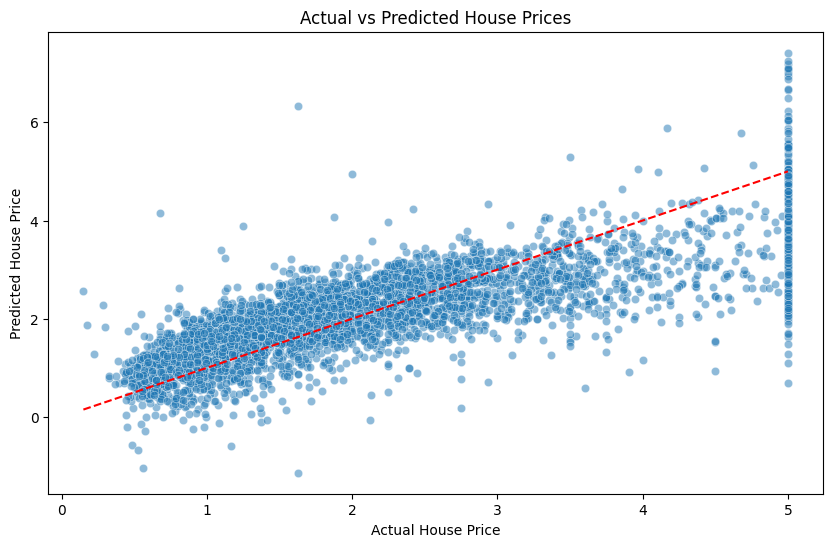

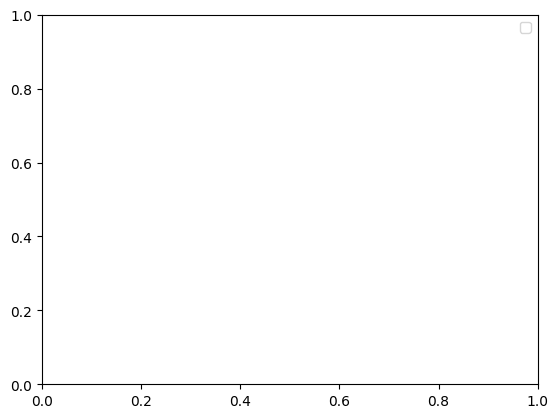

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
plt.legend()

CREATING A BAR PLOT

<Figure size 1400x700 with 0 Axes>

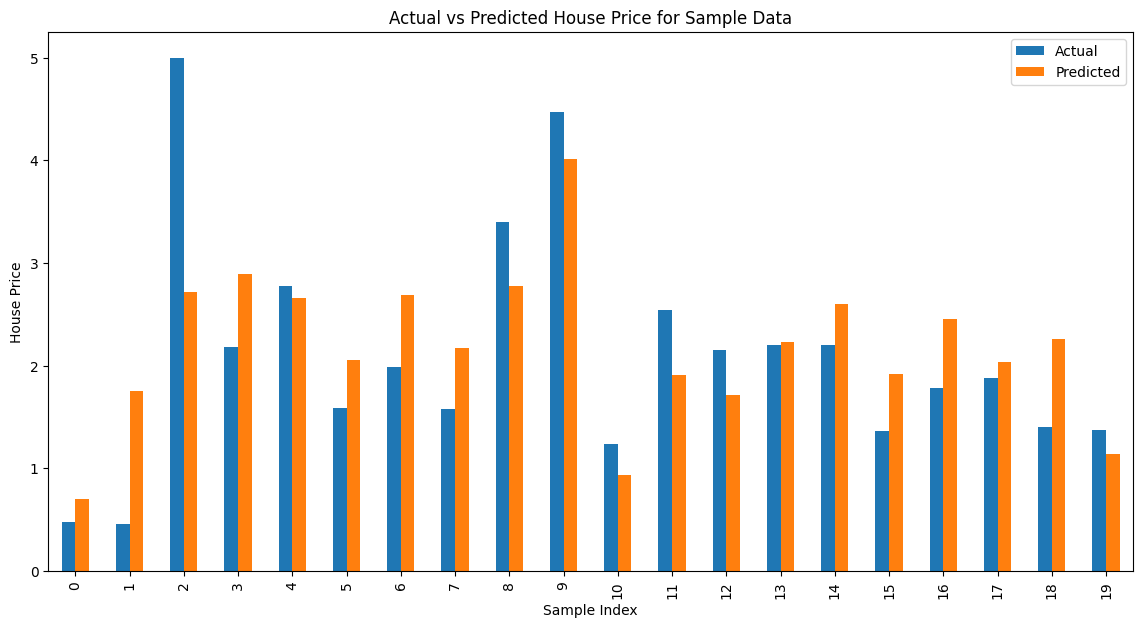

In [47]:
sample_size = 20
indices= np.arange(sample_size)
actual_prices= y_test[: sample_size]. values
predicted_prices = y_pred[:sample_size]
sample_df= pd.DataFrame({
    'Actual': actual_prices,
    'Predicted': predicted_prices
})
plt.figure(figsize=(14,7))
sample_df.plot(kind= 'bar', figsize=(14,7))
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Price for Sample Data')
plt.show()






SAVING THE HOUSE MODEL AND SCALER